In [1]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def dtw_distance(s1, s2):
    """
    Computes the Dynamic Time Warping (DTW) distance between two sequences.
    This is a measure of similarity that allows for stretching and compressing of the sequences to match each other.

    :param s1: First sequence as a list or array
    :param s2: Second sequence as a list or array
    :return: DTW distance as a float
    """
    n, m = len(s1), len(s2)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s1[i-1] - s2[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j],    # insertion
                               dtw_matrix[i, j-1],    # deletion
                               dtw_matrix[i-1, j-1]]) # match
            dtw_matrix[i, j] = cost + last_min

    return dtw_matrix[n, m]

# Sequences to compare
seq1 = [-3, 0, 0, 1, 0, -1, 1, 0, 0, -1, 5]
seq2 = [3, 4, 1, 1, 2, 2, 1, 3, 0, 1, -4]

# Compute DTW distance
dtw_distance_value = dtw_distance(seq1, seq2)
dtw_distance_value


28.0

In [4]:
def dtw_distance_with_path(s1, s2):
    n, m = len(s1), len(s2)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s1[i-1] - s2[j-1])
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min

    # Backtracking to find the path
    i, j = n, m
    path = []
    while i > 0 and j > 0:
        path.append((i-1, j-1))
        min_index = np.argmin([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
        if min_index == 0:
            i -= 1
        elif min_index == 1:
            j -= 1
        else:
            i -= 1
            j -= 1
    path.reverse()

    return dtw_matrix[1:, 1:], path

# Compute DTW distance and path
dtw_matrix, path = dtw_distance_with_path(seq1, seq2)

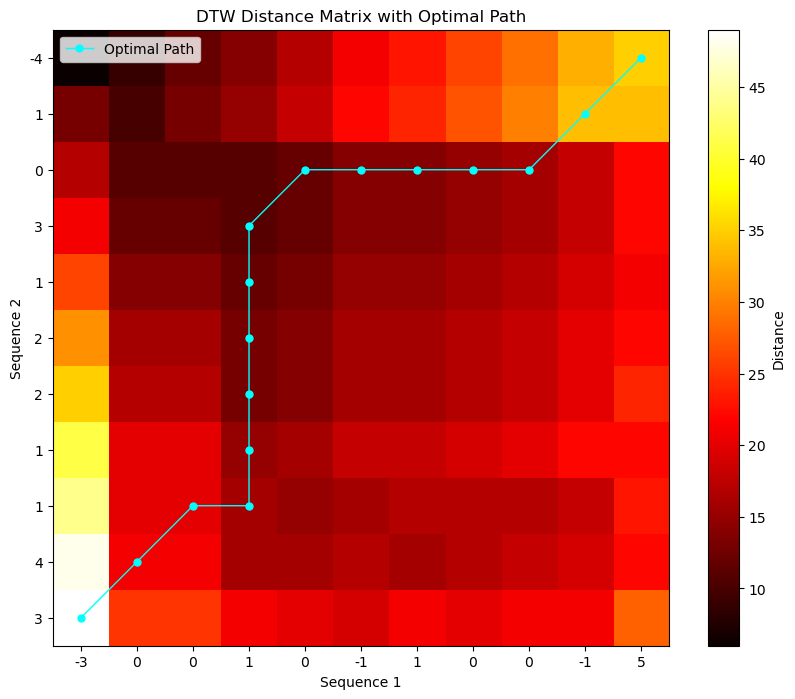

In [5]:
# Rewriting the code to adjust the path and add sequence labels to the axes

def plot_dtw_matrix_with_path_and_labels(dtw_matrix, path, seq1, seq2):
    # Adjust the path to start from the bottom left corner to the top right corner
    adjusted_path_x = [x for x, y in path]
    adjusted_path_y = [dtw_matrix.shape[1] - y - 1 for x, y in path]  # Inverting y-coordinates

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.imshow(dtw_matrix.T, cmap='hot', interpolation='nearest')  # Transposed matrix for swapped axes
    plt.colorbar(label='Distance')
    plt.title('DTW Distance Matrix with Optimal Path')
    
    # Setting sequence values as tick labels
    plt.xticks(ticks=range(len(seq1)), labels=seq1)
    plt.yticks(ticks=range(len(seq2)), labels=seq2[::-1])  # Reverse seq2 for correct orientation

    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')

    # Plotting the adjusted path
    plt.plot(adjusted_path_x, adjusted_path_y, marker='o', color='cyan', linewidth=1, markersize=5, label='Optimal Path')
    plt.legend()
    plt.show()

# Call the function to plot the DTW matrix with the adjusted path and sequence labels
plot_dtw_matrix_with_path_and_labels(dtw_matrix, path, seq1, seq2)
